# 📝 Exercise M4.04

In the previous notebook, we saw the effect of applying some regularization
on the coefficient of a linear model.

In this exercise, we will study the advantage of using some regularization
when dealing with correlated features.

We will first create a regression dataset. This dataset will contain 2,000
samples and 5 features from which only 2 features will be informative.

In [1]:
from sklearn.datasets import make_regression

data, target, coef = make_regression(
    n_samples=2_000, n_features=5, n_informative=2, shuffle=False,
    coef=True, random_state=0, noise=30,
)

When creating the dataset, `make_regression` returns the true coefficient
used to generate the dataset. Let's plot this information.

Features 0     9.566665
Features 1    40.192077
Features 2     0.000000
Features 3     0.000000
Features 4     0.000000
dtype: float64

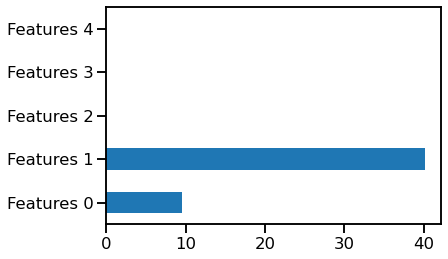

In [2]:
import pandas as pd

feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(coef, index=feature_names)
coef.plot.barh()
coef

Create a `LinearRegression` regressor and fit on the entire dataset and
check the value of the coefficients. Are the coefficients of the linear
regressor close to the coefficients used to generate the dataset?

In [3]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)
linear_regression.coef_

array([10.89587004, 40.41128042, -0.20542454, -0.18954462,  0.11129768])

In [ ]:
feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(linear_regression.coef_, index=feature_names)
_ = coef.plot.barh()

We see that the coefficients are close to the coefficients used to generate
the dataset. The dispersion is indeed cause by the noise injected during the
dataset generation.

Now, create a new dataset that will be the same as `data` with 4 additional
columns that will repeat twice features 0 and 1. This procedure will create
perfectly correlated features.

In [10]:
import numpy as np

column0 = data[:, 0].reshape(len(data), 1)
column1 = data[:, 1].reshape(len(data), 1)
new_data = np.hstack([data, column0, column1, column0, column1,])
new_data

array([[ 1.76405235,  0.40015721,  0.97873798, ...,  0.40015721,
         1.76405235,  0.40015721],
       [-0.97727788,  0.95008842, -0.15135721, ...,  0.95008842,
        -0.97727788,  0.95008842],
       [ 0.14404357,  1.45427351,  0.76103773, ...,  1.45427351,
         0.14404357,  1.45427351],
       ...,
       [-0.77440295,  0.70878733,  0.0184736 , ...,  0.70878733,
        -0.77440295,  0.70878733],
       [-0.25090635, -0.96275025,  0.49340515, ..., -0.96275025,
        -0.25090635, -0.96275025],
       [-1.80928169,  0.04235881,  0.51687218, ...,  0.04235881,
        -1.80928169,  0.04235881]])

Fit again the linear regressor on this new dataset and check the
coefficients. What do you observe?

In [11]:
new_linear_regression = LinearRegression()
new_linear_regression.fit(new_data, target)
new_linear_regression.coef_

array([ 3.63195668, 13.47042681, -0.20542454, -0.18954462,  0.11129768,
        3.63195668, 13.47042681,  3.63195668, 13.47042681])

Create a ridge regressor and fit on the same dataset. Check the coefficients.
What do you observe?

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(new_data, target)
ridge.coef_

array([ 3.6313933 , 13.46802113, -0.20549345, -0.18929961,  0.11117205,
        3.6313933 , 13.46802113,  3.6313933 , 13.46802113])

Can you find the relationship between the ridge coefficients and the original
coefficients?

In [18]:
ridge.coef_[:5] * 3

array([10.89417991, 40.40406338, -0.61648035, -0.56789883,  0.33351616])